In [34]:
import LowLevelFEM as FEM
using LowLevelFEM
using SparseArrays
using LinearAlgebra
using Plots
using Arpack

gmsh.initialize()

In [35]:
plotlyjs()

Plots.PlotlyJSBackend()

In [36]:
gmsh.open("wave_propagation_1D.geo")

Info    : Reading 'wave_propagation_1D.geo'...
Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 30%] Meshing curve 2 (Line)
Info    : [ 50%] Meshing curve 3 (Line)
Info    : [ 80%] Meshing curve 4 (Line)
Info    : Done meshing 1D (Wall 0.000461665s, CPU 0.000464s)
Info    : Meshing 2D...
Info    : Meshing surface 1 (Transfinite)
Info    : Done meshing 2D (Wall 0.000878338s, CPU 0.000795s)
Info    : 303 nodes 408 elements
Info    : Done reading 'wave_propagation_1D.geo'


In [37]:
mat = FEM.material("body", E=1.0, ν=0.0)
problem = FEM.Problem([mat], type="PlaneStress")

Info    : RCMK renumbering...
Info    : Done RCMK renumbering (bandwidth is now 6)


LowLevelFEM.Problem("wave_propagation_1D", "PlaneStress", 2, [("body", 1.0, 0.0, 7.85e-9)], 1.0, 303)

In [38]:
supp = FEM.displacementConstraint("supp", ux=0)
load = FEM.load("supp", fx=0);

In [39]:
dof = problem.non * problem.dim
u0 = zeros(dof)
v0 = zeros(dof);

In [40]:
K = FEM.stiffnessMatrix(problem)

606×606 SparseMatrixCSC{Float64, Int64} with 8170 stored entries:
⎡⠻⣦⣀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎤
⎢⠀⠘⢻⣶⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠉⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠈⢿⣷⣀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠘⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠿⣧⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⢻⣶⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉⠿⣧⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⢿⣷⣀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⠿⣧⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠿⣧⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⢻⣶⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉⠿⣧⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⢻⣶⣀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⠿⣧⡀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⣄⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢻⣶⣀⠀⎥
⎣⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⠻⠆⎦

In [41]:
M = FEM.massMatrix(problem)

606×606 SparseMatrixCSC{Float64, Int64} with 606 stored entries:
⎡⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎤
⎢⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⎥
⎣⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⠄⎦

In [42]:
f = FEM.loadVector(problem, [load])
dof

606

In [43]:
C = K * 0
FEM.applyBoundaryConditions!(problem, K, M, C, f, [supp]);

In [44]:
Tₘᵢₙ = FEM.smallestPeriodTime(K, M)

0.00027834581827027873

In [45]:
(2π / Tₘᵢₙ)^2

5.095541401273914e8

In [46]:
Tₘₐₓ = FEM.largestPeriodTime(K, M)

1.6260789848493251

In [47]:
(2π / Tₘₐₓ)^2

14.930572562141684

In [48]:
ω², ϕ = Arpack.eigs(K, M, nev=100, which=:SR, maxiter=1000)
ω²

100-element Vector{Float64}:
     1.7075804538212727e-7
     0.9999999207968111
     0.9999999772350189
     1.0000003446278907
    14.930572456823992
   434.54447985811345
  2634.9679599783904
  9040.194234793958
 23041.251608477323
 31431.21486356619
     ⋮
     1.0832437700782642e8
     1.1270255545509501e8
     1.1489864509601718e8
     1.1711581775490485e8
     1.2155623051452571e8
     1.2165641663287878e8
     1.2600614358448923e8
     1.2738853503184682e8
     1.275146761389327e8

In [49]:
ω², ϕ = eigen(collect(K), collect(M), sortby=abs)
Δt = 2π ./ .√(real.(abs.(ω²)))
ω²

606-element Vector{Float64}:
     1.4468011896807602e-7
     0.9999999999999086
     1.0
     1.0
    14.930572622170864
   434.54447968361467
  2634.9679599918704
  9040.194234839073
 23041.25160828962
 31431.214863200043
     ⋮
     5.0801553005227476e8
     5.085496434795513e8
     5.0876874744793034e8
     5.0898878529975533e8
     5.092713057227946e8
     5.093027679526461e8
     5.0949128157525235e8
     5.0952270891252476e8
     5.095541401273885e8

In [50]:
FEM.initialDisplacement!(problem, "supp", u0, ux=0)
FEM.initialVelocity!(problem, "body", v0, vx=1000)
FEM.initialVelocity!(problem, "supp", v0, vx=0)

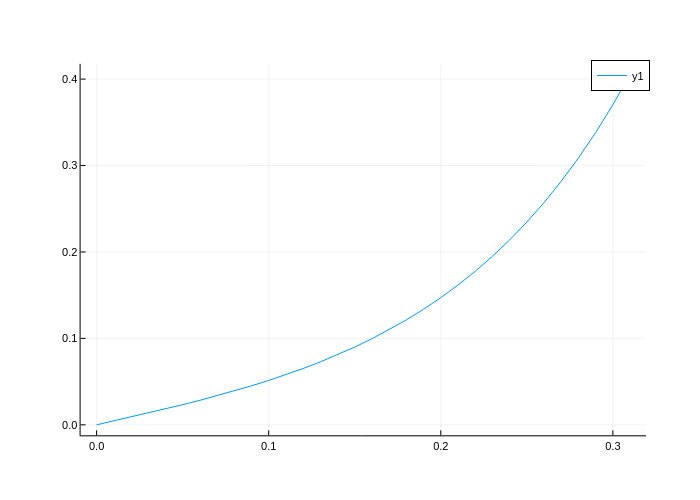

In [96]:
using Optimization, OptimizationOptimJL
ξ_vs_ω(x) = 0.05 * sinh(9x)
x = 0:0.01:1/π
plot(x, ξ_vs_ω.(x))

In [97]:
ωₘᵢₙ = 2π / Tₘₐₓ
ωₘₐₓ = 2π / Tₘᵢₙ
Δt = Tₘᵢₙ / π
function fopt(p, f)
    plt = FEM.HHTaccuracyAnalysis(ωₘᵢₙ, ωₘₐₓ, p[4], "ADR", n=100, α=p[1], β=p[2], γ=p[3])
    δ = sum(abs2, plt[2] - f.(plt[1]))
    return δ
end
p0 = [0, 0.1, 0.1, Δt]
pp = ξ_vs_ω
f = OptimizationFunction(fopt)
prob = Optimization.OptimizationProblem(f, p0, pp, lb=[-1.0, 0.0, 0.0, Δt / 1], ub=[1.0, 1.0, 1.0, 2Δt])
sol = solve(prob, Optim.ParticleSwarm(lower=prob.lb, upper=prob.ub, n_particles=10))

retcode: Failure
u: 4-element Vector{Float64}:
 0.1214560231833143
 0.4038137178458504
 1.0
 8.860022573334651e-5

In [98]:
sol.u[4] / Δt

1.0

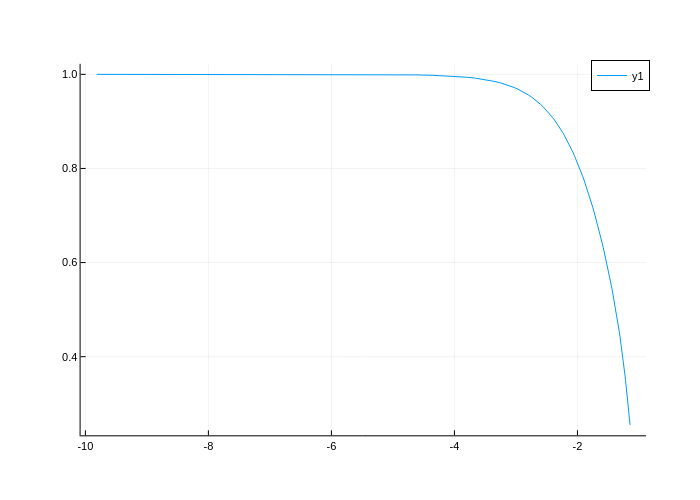

In [100]:
plt = FEM.HHTaccuracyAnalysis(ωₘᵢₙ, ωₘₐₓ, sol.u[4], "SR", n=100, α=sol.u[1], β=sol.u[2], γ=sol.u[3])
plot(plt)

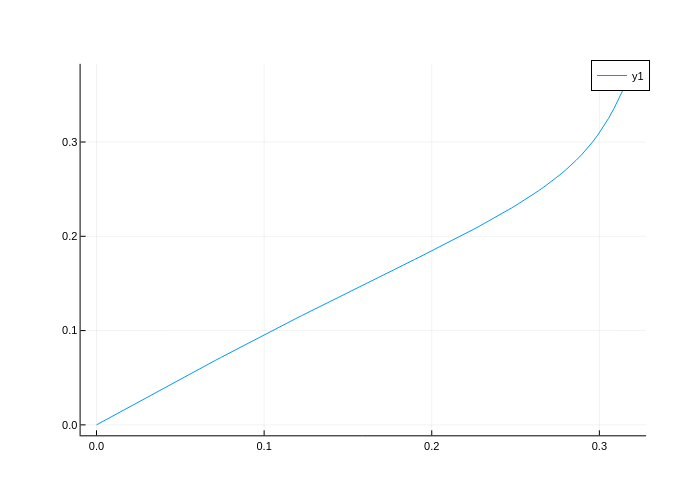

In [103]:
plt = FEM.HHTaccuracyAnalysis(ωₘᵢₙ, ωₘₐₓ, sol.u[4], "ADR", n=100, α=sol.u[1], β=sol.u[2], γ=sol.u[3])
plot(plt)

In [ ]:
plt01 = FEM.HHTaccuracyAnalysis(ωₘᵢₙ, ωₘₐₓ, Δt1, "ADR", n=1000, α=α, δ=δ)
plt02 = FEM.HHTaccuracyAnalysis(ωₘᵢₙ, ωₘₐₓ, Δt2, "ADR", n=1000, α=α, δ=δ)
plt03 = FEM.HHTaccuracyAnalysis(ωₘᵢₙ, ωₘₐₓ, Δt3, "ADR", n=1000, α=α, δ=δ)
plot(plt01)
plot!(plt02)
plot!(plt03)

In [ ]:
plt1 = FEM.HHTaccuracyAnalysis(ωₘᵢₙ, ωₘₐₓ, Δt1, "PE", n=1000, α=α, δ=δ)
plt2 = FEM.HHTaccuracyAnalysis(ωₘᵢₙ, ωₘₐₓ, Δt2, "PE", n=1000, α=α, δ=δ)
plt3 = FEM.HHTaccuracyAnalysis(ωₘᵢₙ, ωₘₐₓ, Δt3, "PE", n=1000, α=α, δ=δ)
plot(plt1)
plot!(plt2)
plot!(plt3)

In [ ]:
u11, v11, t11 = FEM.HHT(K, M, f, u0, v0, 1000Δt1, Δt1, α=α, δ=δ)
u12, v12, t12 = FEM.HHT(K, M, f, u0, v0, 1000Δt2, Δt2, α=α, δ=δ)
u13, v13, t13 = FEM.HHT(K, M, f, u0, v0, 1000Δt3, Δt3, α=α, δ=δ)

In [ ]:
plt1 = FEM.CDMaccuracyAnalysis(ωₘᵢₙ, ωₘₐₓ, Δt1, "SR", n=1000, ξ=ξ1)
plt2 = FEM.CDMaccuracyAnalysis(ωₘᵢₙ, ωₘₐₓ, Δt2, "SR", n=1000, ξ=ξ2)
plt3 = FEM.CDMaccuracyAnalysis(ωₘᵢₙ, ωₘₐₓ, Δt3, "SR", n=1000, ξ=ξ3)
plot(plt1)
plot!(plt2)
plot!(plt3)

In [ ]:
plt1 = FEM.CDMaccuracyAnalysis(ωₘᵢₙ, ωₘₐₓ, Δt1, "PDR", n=1000, ξ=ξ1)
plt2 = FEM.CDMaccuracyAnalysis(ωₘᵢₙ, ωₘₐₓ, Δt2, "PDR", n=1000, ξ=ξ2)
plt3 = FEM.CDMaccuracyAnalysis(ωₘᵢₙ, ωₘₐₓ, Δt3, "PDR", n=1000, ξ=ξ3)
plot(plt1)
plot!(plt2)
plot!(plt3)

In [ ]:
plt1 = FEM.CDMaccuracyAnalysis(ωₘᵢₙ, ωₘₐₓ, Δt1, "ADR", n=1000, ξ=ξ1)
plt2 = FEM.CDMaccuracyAnalysis(ωₘᵢₙ, ωₘₐₓ, Δt2, "ADR", n=1000, ξ=ξ2)
plt3 = FEM.CDMaccuracyAnalysis(ωₘᵢₙ, ωₘₐₓ, Δt3, "ADR", n=1000, ξ=ξ3)
plot(plt1)
plot!(plt2)
plot!(plt3)
plot!(plt01)

In [ ]:
plt1 = FEM.CDMaccuracyAnalysis(ωₘᵢₙ, ωₘₐₓ, Δt1, "PE", n=1000, ξ=ξ1)
plt2 = FEM.CDMaccuracyAnalysis(ωₘᵢₙ, ωₘₐₓ, Δt2, "PE", n=1000, ξ=ξ2)
plt3 = FEM.CDMaccuracyAnalysis(ωₘᵢₙ, ωₘₐₓ, Δt3, "PE", n=1000, ξ=ξ3)
plot(plt1)
plot!(plt2)
plot!(plt3)

In [ ]:
C1 = FEM.dampingMatrix(M, K, ωₘₐₓ, ξ=ξ1)
C2 = FEM.dampingMatrix(M, K, ωₘₐₓ, ξ=ξ2)
C3 = FEM.dampingMatrix(M, K, ωₘₐₓ, ξ=ξ3)

In [ ]:
u21, v21, t21 = FEM.CDM(K, M, C1, f, u0, v0, 1000Δt1, Δt1)
u22, v22, t22 = FEM.CDM(K, M, C2, f, u0, v0, 1000Δt2, Δt2)
u23, v23, t23 = FEM.CDM(K, M, C3, f, u0, v0, 1000Δt3, Δt3)

In [ ]:
S11 = FEM.solveStress(problem, u11)
S12 = FEM.solveStress(problem, u12)
S13 = FEM.solveStress(problem, u13)

In [ ]:
S21 = FEM.solveStress(problem, u21)
S22 = FEM.solveStress(problem, u22)
S23 = FEM.solveStress(problem, u23)

In [ ]:
sx11 = FEM.showStressResults(problem, S11, "sx", name="σx1(t)", t=t11, visible=false, smooth=true)

In [ ]:
sx12 = FEM.showStressResults(problem, S12, "sx", name="σx2(t)", t=t12, visible=false, smooth=true)

In [ ]:
sx13 = FEM.showStressResults(problem, S13, "sx", name="σx3(t)", t=t13, visible=false, smooth=true)

In [ ]:
sx21 = FEM.showStressResults(problem, S21, "sx", name="σx21(t)", t=t21, visible=false, smooth=true)

In [ ]:
sx22 = FEM.showStressResults(problem, S22, "sx", name="σx22(t)", t=t22, visible=false, smooth=true)

In [ ]:
sx23 = FEM.showStressResults(problem, S23, "sx", name="σx23(t)", t=t23, visible=false, smooth=true)

In [ ]:
ph11, xy11 = FEM.plotOnPath(problem, "path", sx11, 500, name="σx1 HHT", step=90, plot=true, visible=true)
sum(abs, diff(xy11[2]))


In [ ]:
ph12, xy12 = FEM.plotOnPath(problem, "path", sx12, 500, name="σx2 HHT", step=90, plot=true, visible=true)
sum(abs, diff(xy12[2]))


In [ ]:
ph13, xy13 = FEM.plotOnPath(problem, "path", sx13, 500, name="σx3 HHT", step=90, plot=true, visible=true)
sum(abs, diff(xy13[2]))


In [ ]:
ph21, xy21 = FEM.plotOnPath(problem, "path", sx21, 500, name="σx1 CDM", step=90, plot=true, visible=true)
sum(abs, diff(xy21[2]))

In [ ]:
ph22, xy22 = FEM.plotOnPath(problem, "path", sx22, 500, name="σx2 CDM", step=90, plot=true, visible=true)
sum(abs, diff(xy22[2]))

In [ ]:
ph23, xy23 = FEM.plotOnPath(problem, "path", sx23, 500, name="σx3 CDM", step=90, plot=true, visible=true)
sum(abs, diff(xy23[2]))

In [ ]:
plot(xy11)
plot!(xy12)
plot!(xy13)
plot!(xy21)
plot!(xy22)
plot!(xy23)

In [ ]:
plot([u11[:, i]' * K * u11[:, i] + v11[:, i]' * M * v11[:, i] for i in 1:length(u11[1, :])])
plot!([u12[:, i]' * K * u12[:, i] + v12[:, i]' * M * v12[:, i] for i in 1:length(u12[1, :])])
plot!([u13[:, i]' * K * u13[:, i] + v13[:, i]' * M * v13[:, i] for i in 1:length(u13[1, :])])
plot!([u21[:, i]' * K * u21[:, i] + v21[:, i]' * M * v21[:, i] for i in 1:length(u11[1, :])])
plot!([u22[:, i]' * K * u22[:, i] + v22[:, i]' * M * v22[:, i] for i in 1:length(u12[1, :])])
plot!([u23[:, i]' * K * u23[:, i] + v23[:, i]' * M * v23[:, i] for i in 1:length(u13[1, :])])

In [ ]:
#gmsh.fltk.run()

In [ ]:
gmsh.finalize()